In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy import stats

In [2]:
df = pd.read_excel("Online Retail.xlsx")

We'll do the data cleaning based on previous EDA condition

In [3]:
#Add Year-Month column

df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
df['Date'] = df['InvoiceDate'].dt.date
df['Date'] = pd.to_datetime(df['Date'])

#Drop null value

df.dropna(subset=['CustomerID', 'Description'], inplace=True)

#Drop negative value in quantity & unit price

df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

#Exclude December 2011 sales

df = df[df['YearMonth'] != '2011-12']

#Add total sales

df['Revenue'] = df['Quantity'] * df['UnitPrice']

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearMonth,Date,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12-01,20.34


In [4]:
#Aggregate data to compute RFM metrics

reference_date = pd.to_datetime('2011-11-30')

rfm = df.groupby('CustomerID').agg({
    'Date': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'Revenue': 'sum'
})

rfm.columns = ['Recency','Frequency','Monetary']

rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,316,1,77183.60
12347.0,30,6,4085.18
12348.0,66,4,1797.24
12349.0,9,1,1757.55
12350.0,301,1,334.40


/Users/rigengunadi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rigengunadi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rigengunadi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

Recency's: Skew: 1.2142241298983685, : SkewtestResult(statistic=26.01508616916657, pvalue=3.3430532823826884e-149)
Frequency's: Skew: 12.023496971470417, : SkewtestResult(statistic=74.20487723286654, pvalue=0.0)
Monetary's: Skew: 20.10684017720211, : SkewtestResult(statistic=85.47302294059502, pvalue=0.0)


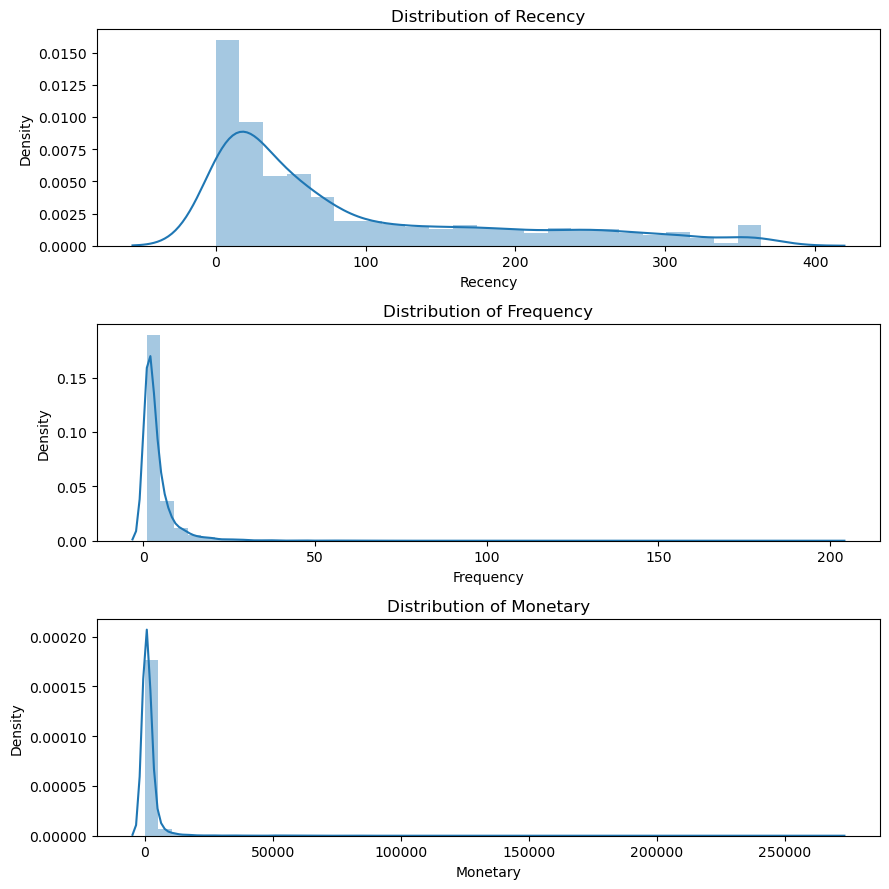

In [5]:
#Plotting distribution to check for skewness

def skewnewss(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

plt.figure(figsize=(9,9))

plt.subplot(3, 1, 1)
skewnewss(rfm,'Recency')

plt.subplot(3, 1, 2)
skewnewss(rfm,'Frequency')

plt.subplot(3, 1, 3)
skewnewss(rfm,'Monetary')

plt.tight_layout()

The data is highly skewed, so we will do log transformation to reduce skewness of each variable.

In [6]:
rfm_log = rfm.copy()
rfm_log = np.log(rfm_log+1)

rfm_log.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,5.758902,0.693147,11.253955
12347.0,3.433987,1.945910,8.315366
12348.0,4.204693,1.609438,7.494564
12349.0,2.302585,0.693147,7.472245
12350.0,5.710427,0.693147,5.815324


/Users/rigengunadi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rigengunadi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rigengunadi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

Recency's: Skew: -0.5373040437318497, : SkewtestResult(statistic=-13.530322095033936, pvalue=1.0356885496865997e-41)
Frequency's: Skew: 1.230164851706168, : SkewtestResult(statistic=26.252901706562124, pvalue=6.622656347534645e-152)
Monetary's: Skew: 0.36978727698958636, : SkewtestResult(statistic=9.603712212086897, pvalue=7.711585639233376e-22)


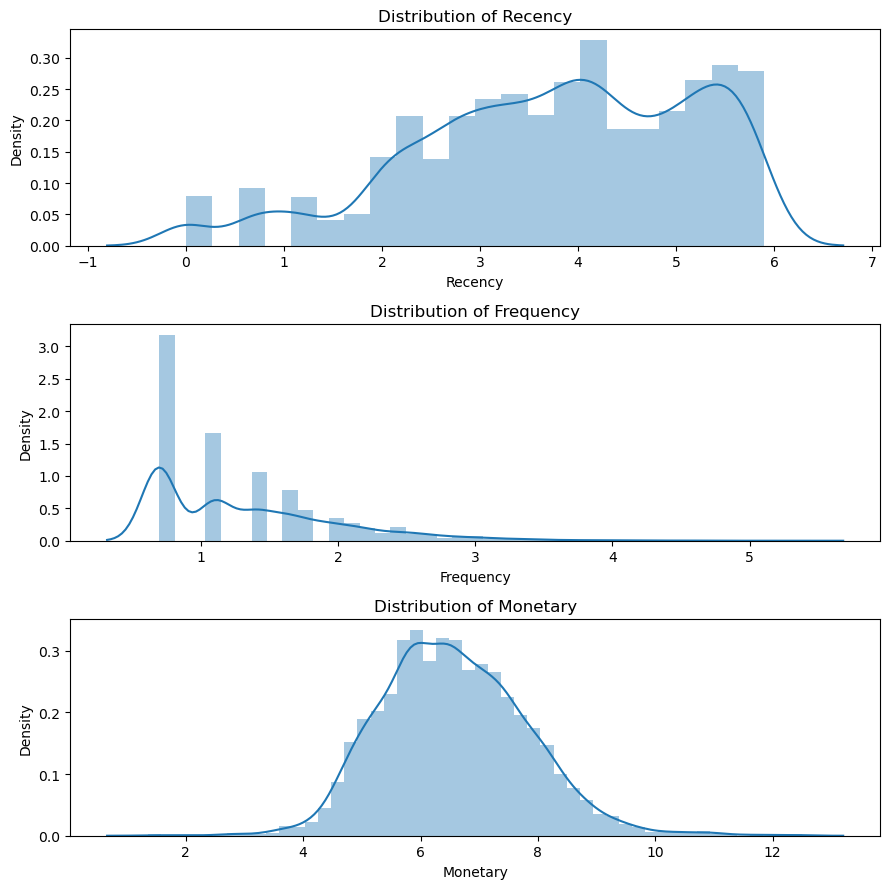

In [7]:
plt.figure(figsize=(9,9))

plt.subplot(3, 1, 1)
skewnewss(rfm_log,'Recency')

plt.subplot(3, 1, 2)
skewnewss(rfm_log,'Frequency')

plt.subplot(3, 1, 3)
skewnewss(rfm_log,'Monetary')

plt.tight_layout()

In [8]:
def calculate_skewness(df):
    skewness = df.apply(lambda x: x.skew())
    return skewness

# Calculate skewness
print("Skewness after Log Transformation:\n", calculate_skewness(rfm_log))

Skewness after Log Transformation:
 Recency     -0.537492
Frequency    1.230594
Monetary     0.369916
dtype: float64


Frequency variable still highly skewed. Therefore we will use yeo-johnson method to reduce skewness

In [9]:
rfm_transformed = rfm.copy()

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
rfm_transformed = pt.fit_transform(rfm_transformed[['Recency','Frequency','Monetary']])

rfm_transformed = pd.DataFrame(rfm_transformed, columns=['Recency','Frequency','Monetary'], index=rfm.index)

rfm_transformed.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,1.603718,-1.136981,3.198036
12347.0,-0.348517,1.102755,1.366659
12348.0,0.214821,0.700126,0.771908
12349.0,-1.051981,-1.136981,0.755174
12350.0,1.554593,-1.136981,-0.575911


Recency's: Skew: -0.06945461059816906, : SkewtestResult(statistic=-1.8596990955501098, pvalue=0.06292811007489439)
Frequency's: Skew: 0.2271843498473423, : SkewtestResult(statistic=6.014730171045665, pvalue=1.8018657846951885e-09)
Monetary's: Skew: -0.01706777508285315, : SkewtestResult(statistic=-0.4575164405001872, pvalue=0.6472998881212368)
Skewness after Box-Cox Transformation:
 Recency     -0.069479
Frequency    0.227264
Monetary    -0.017074
dtype: float64


/Users/rigengunadi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rigengunadi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rigengunadi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

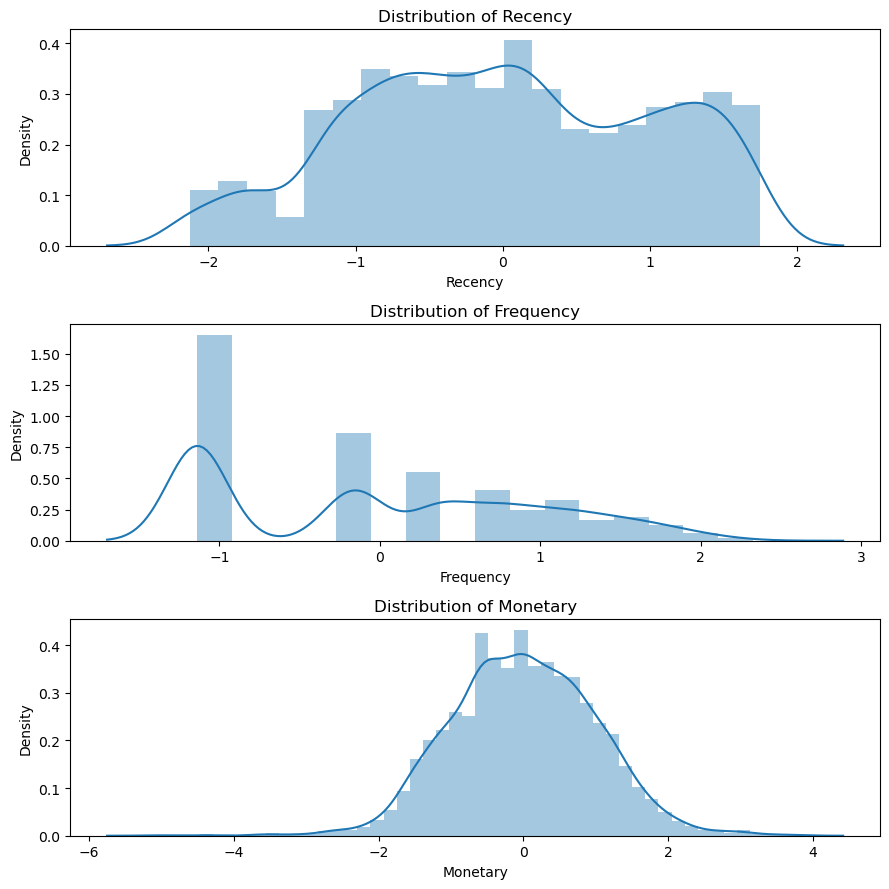

In [10]:
plt.figure(figsize=(9,9))

plt.subplot(3, 1, 1)
skewnewss(rfm_transformed,'Recency')

plt.subplot(3, 1, 2)
skewnewss(rfm_transformed,'Frequency')

plt.subplot(3, 1, 3)
skewnewss(rfm_transformed,'Monetary')

plt.tight_layout()

# Calculate skewness
print("Skewness after Box-Cox Transformation:\n", calculate_skewness(rfm_transformed))

Now all variable have skewness close to 0.

In [11]:
rfm_transformed.describe()

,Recency,Frequency,Monetary
count,4.297000e+03,4.297000e+03,4.297000e+03
mean,-7.669763e-17,-1.942567e-16,6.101447e-16
std,1.000116e+00,1.000116e+00,1.000116e+00
min,-2.124663e+00,-1.136981e+00,-5.185812e+00
25%,-7.761707e-01,-1.136981e+00,-6.564824e-01
50%,-7.887777e-03,-1.587613e-01,-1.244912e-02
75%,8.648157e-01,7.001259e-01,6.848753e-01
max,1.748942e+00,2.326510e+00,3.852033e+00


In [12]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_transformed[['Recency','Frequency','Monetary']])

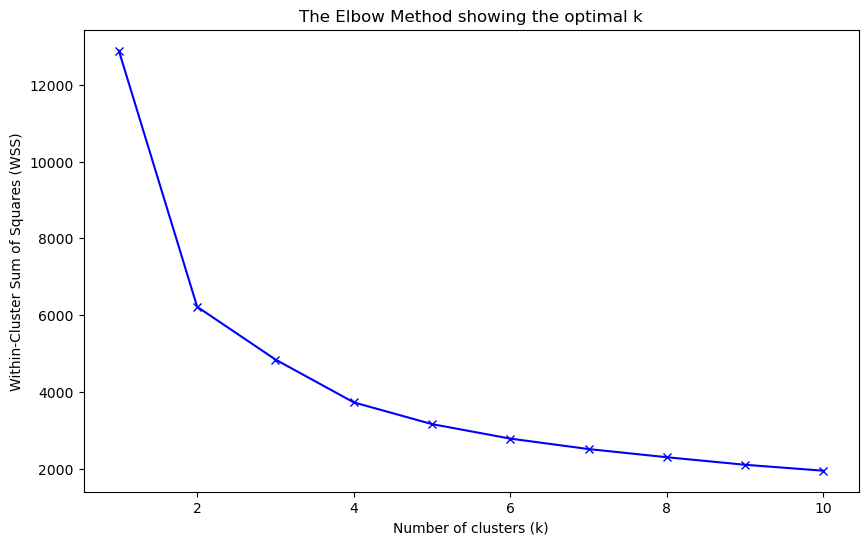

In [13]:
from sklearn.cluster import KMeans

wss = []
K = range(1,11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(K, wss, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title('The Elbow Method showing the optimal k')
plt.show()

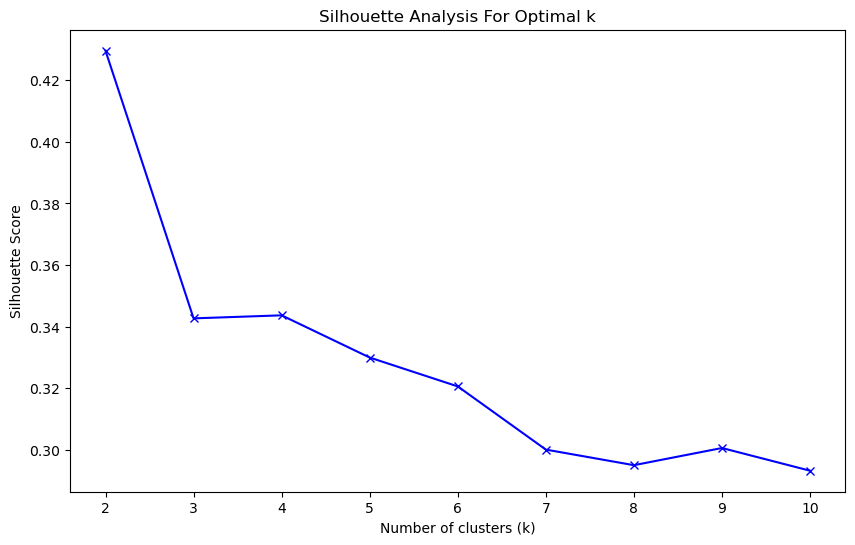

In [14]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(rfm_scaled)
    silhouette_avg = silhouette_score(rfm_scaled, labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Scores
plt.figure(figsize=(10,6))
plt.plot(range(2,11), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.show()

In [15]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(rfm_scaled)
labels = kmeans.labels_

# Add cluster labels to the original RFM dataframe
rfm['Cluster'] = labels

rfm_scaled = pd.DataFrame(rfm_scaled, columns=['Recency','Frequency','Monetary'], index=rfm.index)

rfm_scaled['Cluster'] = labels

In [16]:
rfm_scaled.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,1.603718,-1.136981,3.198036,0
12347.0,-0.348517,1.102755,1.366659,0
12348.0,0.214821,0.700126,0.771908,0
12349.0,-1.051981,-1.136981,0.755174,2
12350.0,1.554593,-1.136981,-0.575911,1


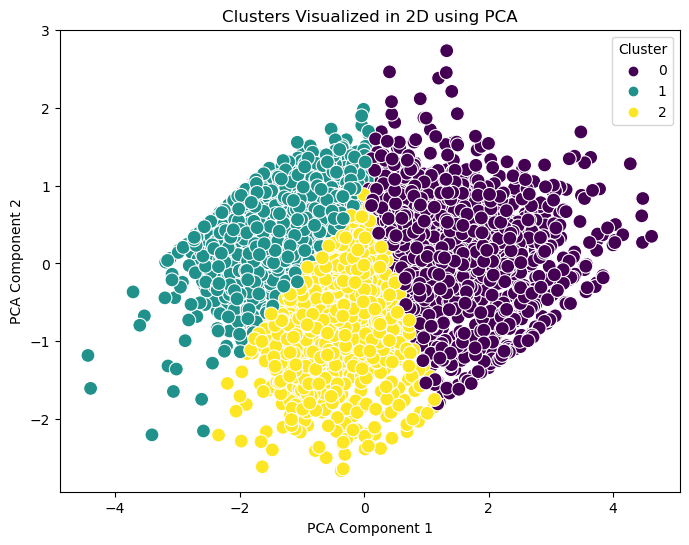

In [36]:
pca = PCA()

rfm_pca = pca.fit_transform(rfm_scaled[['Recency', 'Frequency', 'Monetary']])

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=rfm_pca[:, 0], y=rfm_pca[:, 1], hue=rfm_scaled['Cluster'], palette='viridis', s=100
)
plt.title('Clusters Visualized in 2D using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [37]:
rfm_values = rfm.copy()
rfm_values.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,316,1,77183.60,0
12347.0,30,6,4085.18,0
12348.0,66,4,1797.24,0
12349.0,9,1,1757.55,2
12350.0,301,1,334.40,1


In [38]:
rfm_values = rfm_values.groupby(['Cluster']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean','count']
})

In [39]:
rfm_values.head()

Recency Frequency     Monetary      
               mean      mean         mean count
Cluster                                         
0         32.507766  8.165472  4296.188274  1674
1        215.684890  1.427487   400.352582  1317
2         38.532925  1.688361   516.180392  1306